In [121]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from explore import explore, plot_pixel_array, plot_with_mask
import pydicom
import pandas as pd
from src.dataset import LungDataset, row_to_data
from torchvision import datasets, transforms


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [122]:
ds = LungDataset("train", lazy=True, mask_only=True)

30859.0


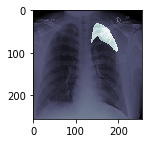

30859.0
tensor([0., 1.])
30859.0
torch.Size([1, 256, 256])
5185.0


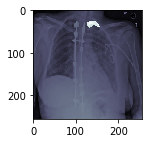

5185.0
tensor([0., 1.])
5185.0
torch.Size([1, 256, 256])
48239.0


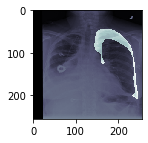

48239.0
tensor([0., 1.])
48239.0
torch.Size([1, 256, 256])
3270.0


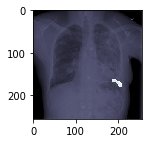

3270.0
tensor([0., 1.])
3270.0
torch.Size([1, 256, 256])
68158.0


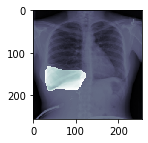

68158.0
tensor([0., 1.])
68158.0
torch.Size([1, 256, 256])
1803.0


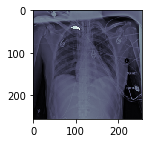

1803.0
tensor([0., 1.])
1803.0
torch.Size([1, 256, 256])
9104.0


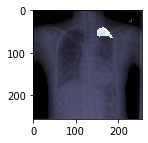

9104.0
tensor([0., 1.])
9104.0
torch.Size([1, 256, 256])
7019.0


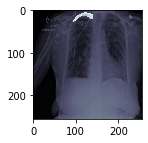

7019.0
tensor([0., 1.])
7019.0
torch.Size([1, 256, 256])
8606.0


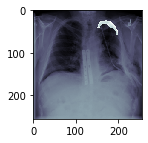

8606.0
tensor([0., 1.])
8606.0
torch.Size([1, 256, 256])
3795.0


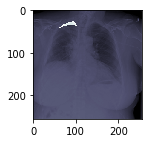

3795.0
tensor([0., 1.])
3795.0
torch.Size([1, 256, 256])


In [123]:
for i in range(10):
    plot_with_mask(*ds[i], (2, 2))
    print(ds[i][1].unique())
    print(ds[i][1].shape)
    

(tensor([0.0000, 0.0039, 0.0078, 0.0118, 0.0157, 0.0196, 0.0235, 0.0275, 0.0314,
         0.0353, 0.0392, 0.0431, 0.0471, 0.0510, 0.0549, 0.0588, 0.0627, 0.0667,
         0.0706, 0.0745, 0.0784, 0.0824, 0.0902, 0.0941, 0.0980, 0.1020, 0.1059,
         0.1137, 0.1216, 0.1255, 0.1294, 0.1412, 0.1451, 0.1490, 0.1529, 0.1647,
         0.1686, 0.1765, 0.1804, 0.1922, 0.2000, 0.2039, 0.2078, 0.2118, 0.2196,
         0.2275, 0.2353, 0.2431, 0.2588, 0.2627, 0.2667, 0.2706, 0.2902, 0.2941,
         0.3020, 0.3098, 0.3137, 0.3176, 0.3255, 0.3294, 0.3333, 0.3412, 0.3490,
         0.3647, 0.3686, 0.3765, 0.3804, 0.3922, 0.3961, 0.4039, 0.4196, 0.4275,
         0.4510, 0.4549, 0.4627, 0.4667, 0.4745, 0.4863, 0.4941, 0.5020, 0.5059,
         0.5098, 0.5176, 0.5216, 0.5255, 0.5294, 0.5490, 0.5608, 0.5647, 0.5725,
         0.5804, 0.5843, 0.6000, 0.6235, 0.6275, 0.6431, 0.6549, 0.6588, 0.6706,
         0.6863, 0.6902, 0.6941, 0.6980, 0.7020, 0.7059, 0.7098, 0.7137, 0.7176,
         0.7216, 0.7294, 0.7

In [4]:
data = ds.data
n = len(data)
num_no_mask = sum([x[1] == '-1' for x in data])
print(f"Percentage of images w/o mask: {100*num_no_mask/n}")

Percentage of images w/o mask: 72.39462714219546


Transforms

In [97]:
image, mask = ds[1]
print(image.shape)
print(mask.shape)

torch.Size([1, 256, 256])
torch.Size([1, 256, 256])


In [77]:
print(mask.unique())

tensor([0.0000, 0.0039, 0.0078, 0.0118, 0.0157, 0.0196, 0.0235, 0.0275, 0.0314,
        0.0353, 0.0392, 0.0431, 0.0471, 0.0510, 0.0549, 0.0588, 0.0627, 0.0667,
        0.0706, 0.0745, 0.0784, 0.0824, 0.0902, 0.0941, 0.0980, 0.1020, 0.1059,
        0.1137, 0.1216, 0.1255, 0.1294, 0.1412, 0.1451, 0.1490, 0.1529, 0.1647,
        0.1686, 0.1765, 0.1804, 0.1922, 0.2000, 0.2039, 0.2078, 0.2118, 0.2196,
        0.2275, 0.2353, 0.2431, 0.2588, 0.2627, 0.2667, 0.2706, 0.2902, 0.2941,
        0.3020, 0.3098, 0.3137, 0.3176, 0.3255, 0.3294, 0.3333, 0.3412, 0.3490,
        0.3647, 0.3686, 0.3765, 0.3804, 0.3922, 0.3961, 0.4039, 0.4196, 0.4275,
        0.4510, 0.4549, 0.4627, 0.4667, 0.4745, 0.4863, 0.4941, 0.5020, 0.5059,
        0.5098, 0.5176, 0.5216, 0.5255, 0.5294, 0.5490, 0.5608, 0.5647, 0.5725,
        0.5804, 0.5843, 0.6000, 0.6235, 0.6275, 0.6431, 0.6549, 0.6588, 0.6706,
        0.6863, 0.6902, 0.6941, 0.6980, 0.7020, 0.7059, 0.7098, 0.7137, 0.7176,
        0.7216, 0.7294, 0.7333, 0.7373, 

In [18]:
image = t(image).numpy()

NameError: name 'image' is not defined

In [ ]:
plot_pixel_array(image[0])